In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [4]:
def plot_ganancias_curva(df):
    def add_zip(x):
        return [i for i in zip(range(5000, 15001, 1000), ast.literal_eval(x))]

    df['ganancia_custom_with_sent'] = df['ganancia_custom'].apply(add_zip)
    plot_df = pd.DataFrame(columns=['x', 'y', 'seed'])
    
    for model in df['model'].unique():
           
    
        series = df[df['model'] == model]['ganancia_custom_with_sent']
        for idx, row in enumerate(series):
            temp_df = pd.DataFrame(row, columns=['x', 'y'])
            temp_df['Model Run'] = idx
            plot_df = pd.concat([plot_df, temp_df])
        plot_df[['x', 'Model Run']] = plot_df[['x', 'Model Run']].apply(pd.to_numeric)
        fig, ax = plt.subplots()
        formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
        ax.yaxis.set_major_formatter(formatter)
        sns.lineplot(data=plot_df, x='x', y='y', hue='Model Run', palette='tab10', ax=ax)
        plt.show()
        
        
def analisis(df_x, n_dataset):
    
    df = df_x.copy()   
    
    fig, axs = plt.subplots(4, 1, figsize=(10, 20)) 
    scaler = StandardScaler()
    
    scores = evaluation_metrics

    for i, score in enumerate(scores):
        if score == 'ganancia_custom':    
            df[score] = df[score].apply(lambda x: sum(ast.literal_eval(x)))     
        df[score] = scaler.fit_transform(df[[score]])    
        df_grouped = df.groupby(['model', 'seed'])[score].mean().unstack(level=0) 
        df_grouped.plot(ax=axs[i], marker='o')
        axs[i].set_title(f'Standardized {score} by model and seed')
        axs[i].set_xlabel('Seed')
        axs[i].set_ylabel('Standardized ' + score)
        axs[i].legend(title='Model')

    plt.tight_layout()
    plt.show()
    
    
def spearman(df):
    serie_hpo = df[df['model'] == 'LightGBM HPO']
    
    models_vs = df['model'].unique().tolist()
    models_vs.remove('LightGBM HPO')

    results = {}
    for metric in evaluation_metrics:
        metric_results = {}
        for model in models_vs:
            serie_2 = df[df['model'] == model]
            res = spearmanr(serie_hpo[metric], serie_2[metric])
            metric_results[(model, 'sp_correlation')] = res[0]
            metric_results[(model, 'p-value')] = res[1]
        results[metric] = metric_results

    df_results = pd.DataFrame(results).T
    df_results.columns = pd.MultiIndex.from_tuples(df_results.columns, names=['model', 'value'])    
    return df_results

In [5]:
evaluation_metrics = ['f1_score', 'mcc', 'auc', 'ganancia_custom']

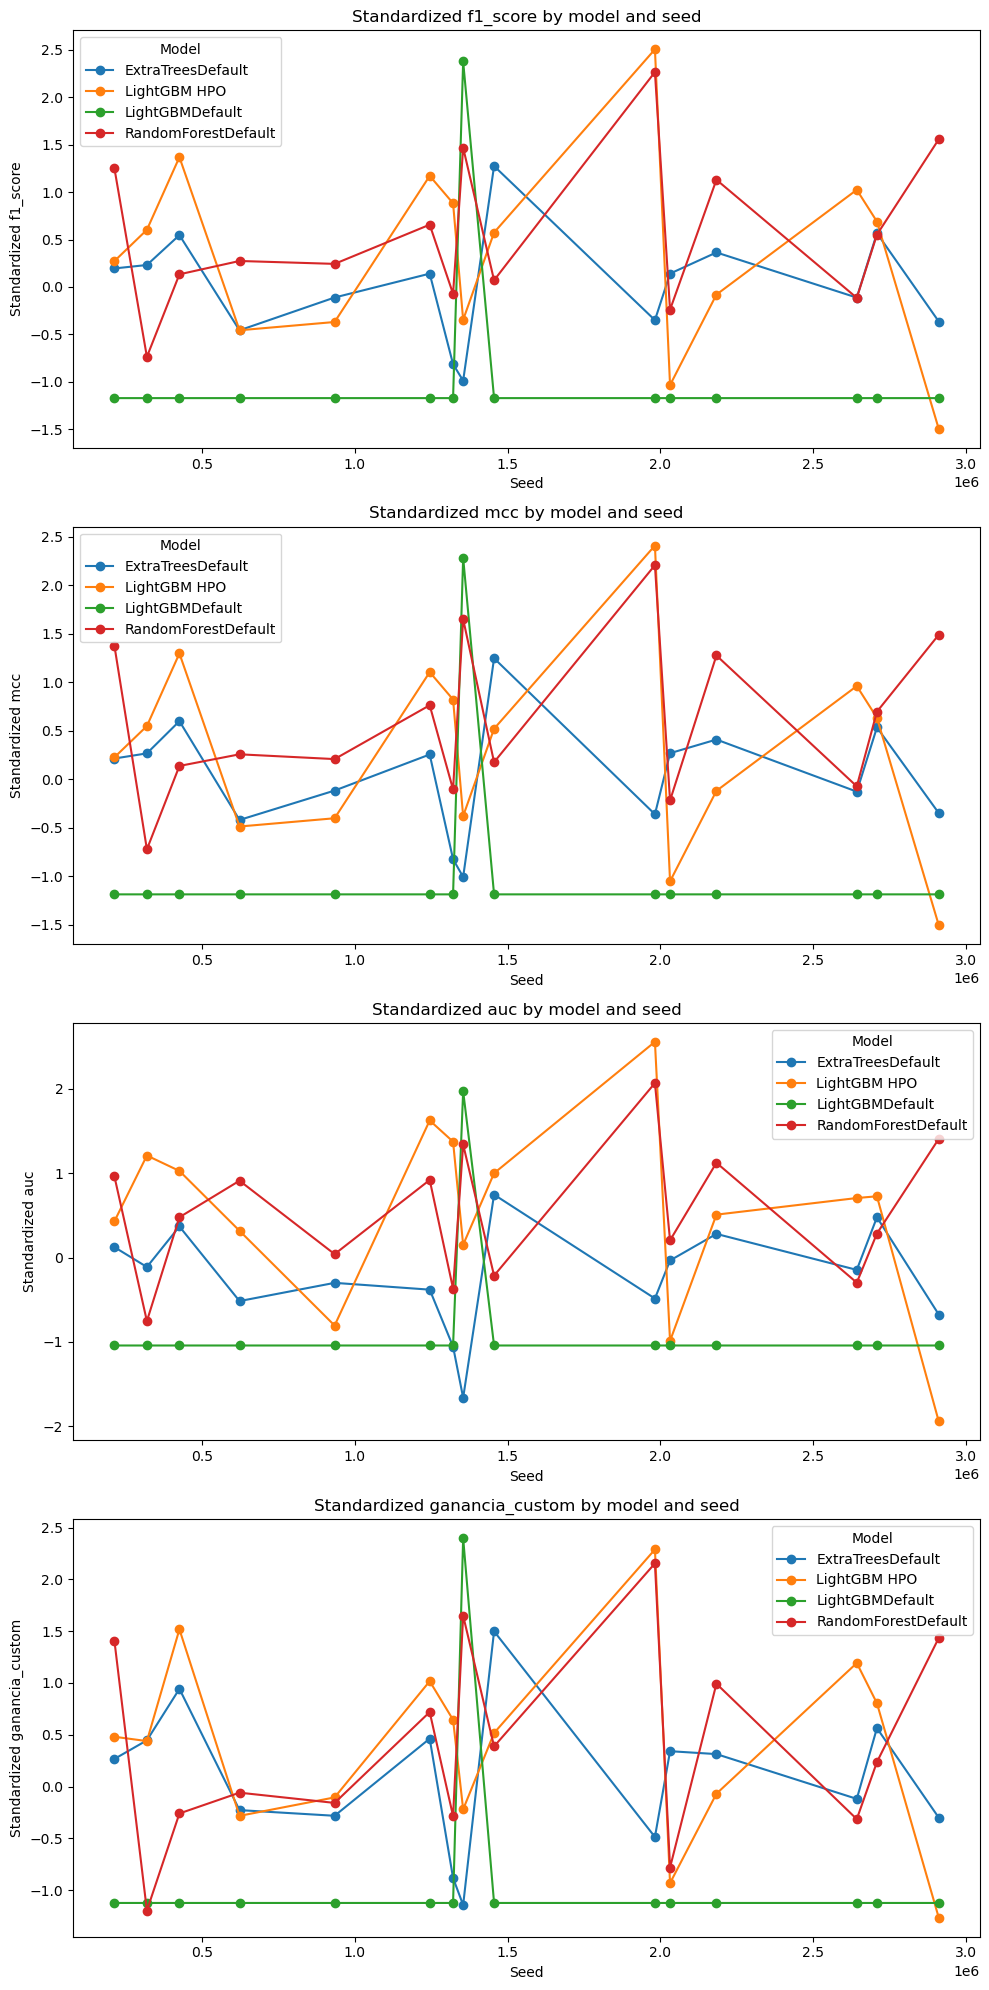

model           LightGBMDefault           ExtraTreesDefault            \
value            sp_correlation   p-value    sp_correlation   p-value   
f1_score              -0.185577  0.507861          0.214286  0.443141   
mcc                   -0.185577  0.507861          0.157143  0.575953   
auc                   -0.247436  0.373939          0.121429  0.666401   
ganancia_custom       -0.309295  0.261965          0.428571  0.110960   

model           RandomForestDefault            
value                sp_correlation   p-value  
f1_score                  -0.060714  0.829812  
mcc                       -0.064286  0.819948  
auc                       -0.192857  0.491049  
ganancia_custom           -0.278571  0.314709

In [12]:
dataset = 11

df = pd.read_csv(f'exp_results_exp_exp_seeds_{dataset}.csv')
analisis(df,str(dataset))
spearman(df)

In [71]:
spearmanr(lightgbm_serie,rf_serie)

SignificanceResult(statistic=0.4889821045214989, pvalue=0.0643508045090754)

In [30]:
lightgbm_serie = df[df['model'] == 'LightGBM HPO']['f1_score'].reset_index(drop=True)

In [31]:
rf_serie = df[df['model'] == 'RandomForestDefault']['f1_score'].reset_index(drop=True)

In [70]:
lightgbm_serie = pd.Series([1,0,1,0,1,0,1,100000,0,0,1,1,1,0,1])

In [53]:
rf_serie

0     0.093729
1     0.058569
2     0.063682
3     0.054975
4     0.088290
5     0.050767
6     0.085215
7     0.062914
8     0.113757
9     0.038263
10    0.070667
11    0.095952
12    0.073304
13    0.053909
14    0.060149
Name: f1_score, dtype: float64

0     1
1     0
2     0
3     0
4     1
5     1
6     0
7     0
8     1
9     1
10    1
11    1
12    1
dtype: int64

In [48]:
rf_serie

0     0.093729
1     0.058569
2     0.063682
3     0.054975
4     0.088290
5     0.050767
6     0.085215
7     0.062914
8     0.113757
9     0.038263
10    0.070667
11    0.095952
12    0.073304
13    0.053909
14    0.060149
Name: f1_score, dtype: float64

In [42]:
pd.concat([lightgbm_serie,rf_serie], axis=1)

,0,f1_score
0,1,0.093729
1,1,0.058569
2,1,0.063682
3,1,0.054975
4,1,0.088290
5,1,0.050767
6,1,0.085215
7,1,0.062914
8,1,0.113757
9,1,0.038263


In [36]:
df.groupby('model').sum()

C:\Users\esteban\AppData\Local\Temp\ipykernel_9388\1782809413.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('model').sum()


,seed,training_time,f1_score,mcc,auc
model,,,,,
ExtraTreesDefault,22350717,10.603926,1.037134,1.063434,9.660572
LightGBM HPO,22350717,1303.463284,0.861060,0.759155,10.106690
LightGBMDefault,22350717,11.030767,0.803528,0.670290,10.178569
RandomForestDefault,22350717,15.324950,1.121627,1.210941,10.649712


model           LightGBMDefault           ExtraTreesDefault            \
value            sp_correlation   p-value    sp_correlation   p-value   
f1_score               0.185577  0.507861         -0.303571  0.271356   
mcc                    0.185577  0.507861         -0.285714  0.301936   
auc                   -0.371154  0.173193          0.060714  0.829812   
ganancia_custom        0.061859  0.826648          0.039286  0.889446   

model           RandomForestDefault            
value                sp_correlation   p-value  
f1_score                  -0.517857  0.048004  
mcc                       -0.514286  0.049839  
auc                       -0.371429  0.172850  
ganancia_custom            0.425000  0.114295

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def barplot(df, metrica):    
    plt.figure(figsize=(10, 6))
    sns.barplot(x="model", y=metrica, data=df)
    plt.title(f"Comparación de {metrica} entre modelos")
    plt.show()    
    
def correlacion(df, metrica):
    data_wide_1 = df[df["model"]=="LightGBM"][["seed", metrica]].rename(columns={metrica: f"{metrica}_LightGBM"})
    data_wide_2 = df[df["model"]=="ExtraTreesDefault"][["seed", metrica]].rename(columns={metrica: f"{metrica}_ExtraTrees"})
    data_wide = pd.merge(data_wide_1, data_wide_2, on="seed")
    correlation_pearson = data_wide[f"{metrica}_LightGBM"].corr(data_wide[f"{metrica}_ExtraTrees"], method='pearson')
    print(f'Pearson correlation: {correlation_pearson}')
    correlation_spearman = data_wide[f"{metrica}_LightGBM"].corr(data_wide[f"{metrica}_ExtraTrees"], method='spearman')
    print(f'Spearman correlation: {correlation_spearman}')